In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.datasets import load_files
from nltk.corpus import stopwords
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mariam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
DATA_DIR = "data\\bbc\\"

# load_files is a function that loads text files from the directory specified by DATA_DIR
# and returns a Bunch object containing the loaded data.
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=12)
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])

df.shape

(2225, 2)

In [58]:
df.head()

,text,label
0,Call for Kenteris to be cleared\n\nKostas Kent...,3
1,Iranian MPs threaten mobile deal\n\nTurkey's b...,0
2,Farrell due to make US TV debut\n\nActor Colin...,1
3,Parry relishes Anfield challenge\n\nBBC Sport ...,3
4,The Producers scoops stage awards\n\nThe Produ...,1


# Pre-Processing

In [59]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

df['text'] = df['text'].apply(preprocess_text)

In [60]:
df.head()

,text,label
0,call kenteris cleared kostas kenteris lawyer c...,3
1,iranian mps threaten mobile deal turkeys bigge...,0
2,farrell due make us tv debut actor colin farre...,1
3,parry relishes anfield challenge bbc sport ref...,3
4,producers scoops stage awards producers beaten...,1


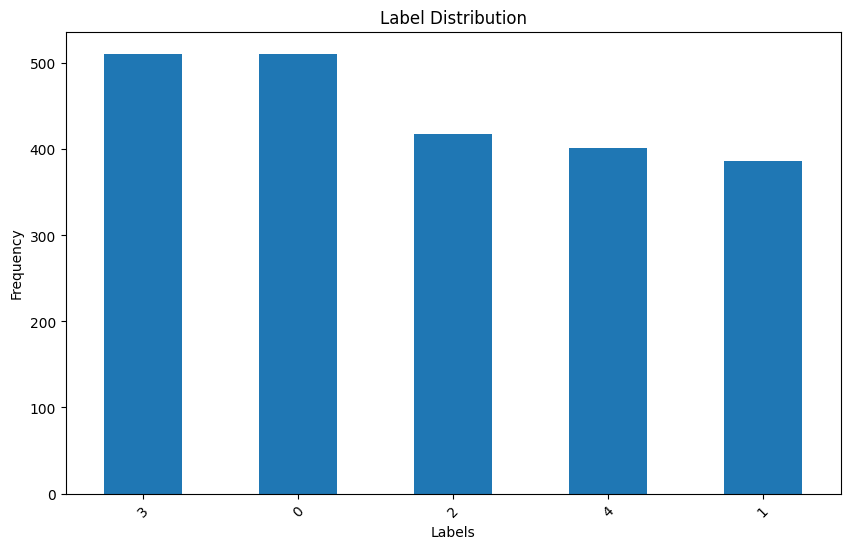

In [61]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [62]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tf_idf = TfidfVectorizer()
X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

# Evaluating Multiple Model

In [63]:
def fit_and_score(X_train, X_test, y_train, y_test, models):
    scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)

    return scores

models = {
    'KNN' : KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=120),
    'SVM' : SVC(kernel='linear'),
    'LR' : LogisticRegression(solver='liblinear'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

scores = fit_and_score(X_train, X_test, y_train, y_test, models)

print(scores)

{'KNN': 0.9303370786516854, 'Random Forest': 0.9595505617977528, 'SVM': 0.9797752808988764, 'LR': 0.9752808988764045, 'XGBoost': 0.946067415730337}


# Chosen Model

In [65]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

# Predict

In [66]:
def predict_news(news):
    preprocessed_text = preprocess_text(news)
    transformed_text = tf_idf.transform([preprocessed_text])
    predicted_category = model.predict(transformed_text)
    
    return f"The predicted category for the sample text is: {predicted_category[0]}"


print(predict_news("The stock market saw a significant increase today as major companies reported record profits."))
print(predict_news("The football world cup start at the end of this year."))

The predicted category for the sample text is: 0
The predicted category for the sample text is: 3
